<a href="https://colab.research.google.com/github/rohansarmandal/hello-world/blob/main/Day%203%20updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
deliveries=pd.read_csv("deliveries.csv")
matches= pd.read_csv("matches.csv")

# Finding Matches where Dhoni came to Bat
msd_matches_ball_by_ball= deliveries[deliveries["batsman"]=="MS Dhoni"]
msd_matches_ball_by_ball

# Unique Match list where Dhoni played
msd_matches_ball_by_ball["match_id"].unique()
unique_list=msd_matches_ball_by_ball["match_id"].unique().tolist()  #tolist converts array to list
len(unique_list)

unique_matches=[]
for id_match in unique_list:
  msd_df= matches[matches["id"]==id_match] #compare match id 
  unique_matches.append(msd_df.iloc[0])		#appending lists of 1*18
unique_matches

unique_df=pd.DataFrame(unique_matches) #converting to dataframe
unique_df

# Sort as per date
unique_df["date"]=pd.to_datetime(unique_df["date"])
unique_df.sort_values(by="date")


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,11309,2019,Chennai,2019-06-04,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,Harbhajan Singh,M. A. Chidambaram Stadium,KN Ananthapadmanabhan,Rod Tucker,C Shamshuddin
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
720,11316,2019,Jaipur,2019-11-04,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Sawai Mansingh Stadium,Bruce Oxenford,Ulhas Gandhe,Chris Gaffaney


In [4]:
unique_df=unique_df.sort_values("date")
unique_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,11309,2019,Chennai,2019-06-04,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,Harbhajan Singh,M. A. Chidambaram Stadium,KN Ananthapadmanabhan,Rod Tucker,C Shamshuddin
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
720,11316,2019,Jaipur,2019-11-04,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Sawai Mansingh Stadium,Bruce Oxenford,Ulhas Gandhe,Chris Gaffaney


In [14]:
msd_temp=deliveries[(deliveries["match_id"]==74) & (deliveries["batsman"]=="MS Dhoni")]
msd_temp["batsman_runs"].sum()





65

In [13]:
len(msd_temp)

31

In [29]:
msd_runs_all=[]
for index,row in unique_df.iterrows():
  msd_temp=deliveries[(deliveries["match_id"]==row["id"]) & (deliveries["batsman"]=="MS Dhoni")]
  runs_msd=msd_temp["batsman_runs"].sum()
  msd_runs_all.append(runs_msd)

 

In [32]:
unique_df["msd_runs"]= msd_runs_all
unique_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,msd_runs
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,30
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN,43
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN,65
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,11309,2019,Chennai,2019-06-04,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,Harbhajan Singh,M. A. Chidambaram Stadium,KN Ananthapadmanabhan,Rod Tucker,C Shamshuddin,39
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,38
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,10
720,11316,2019,Jaipur,2019-11-04,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Sawai Mansingh Stadium,Bruce Oxenford,Ulhas Gandhe,Chris Gaffaney,60


In [43]:
balls=[]
sr=[]
ten=[]
ten_thirty=[]
thirty_plus=[]

for index,row in unique_df.iterrows():
  msd_temp=deliveries[(deliveries["match_id"]==row["id"]) & (deliveries["batsman"]=="MS Dhoni")]
  msd_temp2=msd_temp[msd_temp["wide_runs"]==0]
  balls_msd=len(msd_temp[msd_temp["wide_runs"]==0])
  balls.append(balls_msd)       # balls per innings
  if(balls_msd<=10):
    ten.append(msd_temp["batsman_runs"].sum())
    ten_thirty.append(0)
    thirty_plus.append(0)
  elif((balls_msd>10) & (balls_msd<=30)):
    ten.append(msd_temp2.iloc[0:10]["batsman_runs"].sum())
    ten_thirty.append(msd_temp2.iloc[10:]["batsman_runs"].sum())
    thirty_plus.append(0)
  else:
    ten.append(msd_temp2.iloc[0:10]["batsman_runs"].sum())
    ten_thirty.append(msd_temp2.iloc[10:30]["batsman_runs"].sum())
    thirty_plus.append(msd_temp2.iloc[30:]["batsman_runs"].sum())

In [46]:
unique_df["balls"]=balls
unique_df["ten"]=ten
unique_df["ten_thirty"]=ten_thirty
unique_df["thirty_plus"]=thirty_plus

In [47]:
unique_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,msd_runs,balls,ten,ten_thirty,thirty_plus
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2,3,2,0,0
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,30,16,18,12,0
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN,43,27,6,37,0
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN,65,30,10,55,0
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN,32,27,15,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,11309,2019,Chennai,2019-06-04,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,Harbhajan Singh,M. A. Chidambaram Stadium,KN Ananthapadmanabhan,Rod Tucker,C Shamshuddin,39,23,5,32,0
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,38,29,13,25,0
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,10,9,10,0,0
720,11316,2019,Jaipur,2019-11-04,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Sawai Mansingh Stadium,Bruce Oxenford,Ulhas Gandhe,Chris Gaffaney,60,43,11,27,21


In [50]:
sr=[]
for index,row in unique_df.iterrows():
  sr_temp= row["msd_runs"]/row["balls"]*100  
  sr.append(sr_temp)


In [52]:
unique_df["sr"]=sr

In [53]:
unique_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,msd_runs,balls,ten,ten_thirty,thirty_plus,sr
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2,3,2,0,0,66.666667
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,30,16,18,12,0,187.500000
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN,43,27,6,37,0,159.259259
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN,65,30,10,55,0,216.666667
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN,32,27,15,17,0,118.518519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,11309,2019,Chennai,2019-06-04,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,Harbhajan Singh,M. A. Chidambaram Stadium,KN Ananthapadmanabhan,Rod Tucker,C Shamshuddin,39,23,5,32,0,169.565217
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,38,29,13,25,0,131.034483
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,10,9,10,0,0,111.111111
720,11316,2019,Jaipur,2019-11-04,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Sawai Mansingh Stadium,Bruce Oxenford,Ulhas Gandhe,Chris Gaffaney,60,43,11,27,21,139.534884


In [1]:
msd_groupby_season= unique_df.groupby(["season"])

NameError: ignored

In [2]:
#Importing datasets

import pandas as pd
deliveries=pd.read_csv("deliveries.csv")
matches= pd.read_csv("matches.csv")

# Finding Matches where Dhoni came to Bat
msd_matches_ball_by_ball= deliveries[deliveries["batsman"]=="MS Dhoni"]
msd_matches_ball_by_ball

# Unique Match list where Dhoni played
msd_matches_ball_by_ball["match_id"].unique()
unique_list=msd_matches_ball_by_ball["match_id"].unique().tolist()  #tolist converts array to list
len(unique_list)

unique_matches=[]
for id_match in unique_list:
  msd_df= matches[matches["id"]==id_match] #compare match id 
  unique_matches.append(msd_df.iloc[0])		#appending lists of 1*18
unique_matches

unique_df=pd.DataFrame(unique_matches) #converting to dataframe
unique_df

# Sort as per date
unique_df["date"]=pd.to_datetime(unique_df["date"])
unique_df.sort_values(by="date")

#Match 74 data selection of Dhoni
msd_temp=deliveries[(deliveries["match_id"]==74) & (deliveries["batsman"]=="MS Dhoni")]

#Match 74 Runs scored by Dhoni
msd_temp["batsman_runs"].sum()

#Runs Scored by Dhoni in each game

msd_runs_all=[]
for index,row in unique_df.iterrows():
  msd_temp=deliveries[(deliveries["match_id"]==row["id"]) & (deliveries["batsman"]=="MS Dhoni")]
  runs_msd=msd_temp["batsman_runs"].sum()
  msd_runs_all.append(runs_msd)
unique_df["msd_runs"]= msd_runs_all

#Balls, Sr, runs in 1st 30 etc
balls=[]
sr=[]
ten=[]
ten_thirty=[]
thirty_plus=[]

for index,row in unique_df.iterrows():
  msd_temp=deliveries[(deliveries["match_id"]==row["id"]) & (deliveries["batsman"]=="MS Dhoni")]
  msd_temp2=msd_temp[msd_temp["wide_runs"]==0]
  balls_msd=len(msd_temp[msd_temp["wide_runs"]==0])
  balls.append(balls_msd)       # balls per innings
  if(balls_msd<=10):
    ten.append(msd_temp["batsman_runs"].sum()) 
    ten_thirty.append(0)
    thirty_plus.append(0)
  elif((balls_msd>10) & (balls_msd<=30)):
    ten.append(msd_temp2.iloc[0:10]["batsman_runs"].sum()) #first 10 balls
    ten_thirty.append(msd_temp2.iloc[10:]["batsman_runs"].sum())
    thirty_plus.append(0)
  else:
    ten.append(msd_temp2.iloc[0:10]["batsman_runs"].sum())
    ten_thirty.append(msd_temp2.iloc[10:30]["batsman_runs"].sum())
    thirty_plus.append(msd_temp2.iloc[30:]["batsman_runs"].sum())


#Balls, Sr, runs in 1st 30 etc added to table

unique_df["balls"]=balls
unique_df["ten"]=ten
unique_df["ten_thirty"]=ten_thirty
unique_df["thirty_plus"]=thirty_plus

#SR calculation

sr=[]
for index,row in unique_df.iterrows():
  sr_temp= row["msd_runs"]/row["balls"]*100  
  sr.append(sr_temp)

unique_df["sr"]=sr


# Grouping by season

msd_groupby_season= unique_df.groupby(["season"])

In [5]:
msd_data=msd_groupby_season.mean()

<BarContainer object of 12 artists>

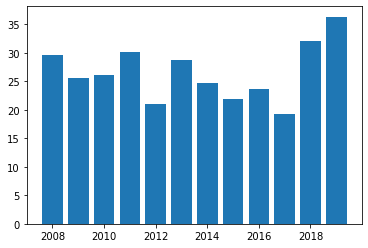

In [10]:
import matplotlib.pyplot as plt
x_axis= msd_data.index.tolist()
y_axis= msd_data['msd_runs'].tolist()
plt.bar(x_axis,y_axis)